In [12]:
import pandas as pd

In [13]:
#Lendo arquivo Chess

df_chess = pd.read_excel('Chess.xlsx', sheet_name='Chess')

In [14]:
df_chess.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+17,1.504130e+17,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,1.504110e+17,1.504110e+17,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,1.504030e+17,1.504030e+17,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5


In [15]:
df_tomato = pd.read_csv('Tomato.csv')

In [16]:
df_tomato.head()

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato
2,2013-06-18,Kg,22,26,24.0,Tomato
3,2013-06-19,Kg,24,28,26.0,Tomato
4,2013-06-20,Kg,22,26,24.0,Tomato


In [17]:
import matplotlib.pyplot as plt

In [18]:
def categorizar_tomate_media(media):
    if media >= 40 and media <= 70:
        return "tomate_medio"
    elif media < 40:
        return "tomate_pequeno"
    else:
        return "tomate_grande"

In [19]:
df_tomato["categoria_tomate"] = df_tomato["Average"].apply(categorizar_tomate_media)

df_tomato.head()

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate_pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate_pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate_pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate_pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate_pequeno


In [20]:
df_tomato.groupby(["categoria_tomate"]).describe()

Minimum                                                      \
                   count       mean       std   min   25%   50%   75%    max   
categoria_tomate                                                               
tomate_grande      149.0  75.744966  7.324666  65.0  70.0  75.0  80.0  115.0   
tomate_medio       954.0  47.818658  8.203065  30.0  40.0  45.0  55.0   65.0   
tomate_pequeno    1638.0  23.978022  7.175572   8.0  18.0  25.0  30.0   38.0   

                 Maximum             ...              Average             \
                   count       mean  ...   75%    max   count       mean   
categoria_tomate                     ...                                   
tomate_grande      149.0  82.583893  ...  85.0  120.0   149.0  79.164430   
tomate_medio       954.0  55.009434  ...  60.0   75.0   954.0  51.414046   
tomate_pequeno    1638.0  29.528694  ...  35.0   44.0  1638.0  26.753358   

                                                           
                       std   min   25%   50%   75%    max  
categoria_tomate                                           
tomate_grande     7.367396  70.5  75.0  77.5  82.5  117.5  
tomate_medio      8.272792  40.0  45.0  50.0  57.5   70.0  
tomate_pequeno    7.191735  10.0  21.5  27.5  32.5   39.5  

[3 rows x 24 columns]

In [21]:
filtro = df_tomato["Average"] < 40

df_tomato.loc[filtro]



,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate_pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate_pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate_pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate_pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate_pequeno
...,...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,Tomato,tomate_pequeno
2737,2021-05-10,Kg,10,15,12.5,Tomato,tomate_pequeno
2738,2021-05-11,Kg,10,15,12.5,Tomato,tomate_pequeno
2739,2021-05-12,Kg,30,35,32.5,Tomato,tomate_pequeno


In [22]:
df_tomato["Date"] = pd.to_datetime(df_tomato["Date"])

df_tomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2741 non-null   datetime64[ns]
 1   Unit              2741 non-null   object        
 2   Minimum           2741 non-null   int64         
 3   Maximum           2741 non-null   int64         
 4   Average           2741 non-null   float64       
 5   Market            2741 non-null   object        
 6   categoria_tomate  2741 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 150.0+ KB


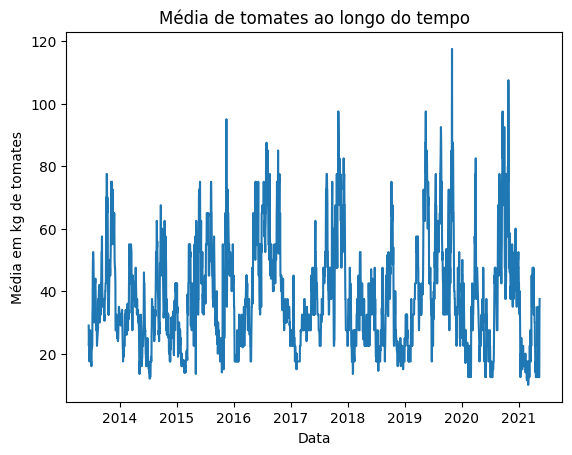

In [23]:
plt.plot(df_tomato["Date"], df_tomato["Average"])
plt.xlabel("Data")
plt.ylabel("Média em kg de tomates")
plt.title("Média de tomates ao longo do tempo")
plt.show()

In [24]:
df_chess.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+17,1.504130e+17,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,1.504110e+17,1.504110e+17,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,1.504030e+17,1.504030e+17,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5


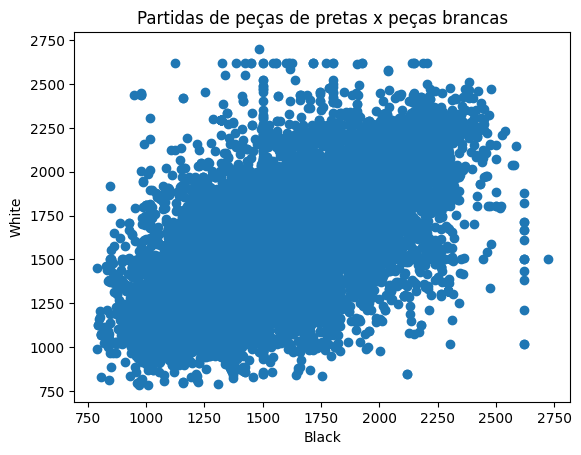

In [25]:
plt.scatter(df_chess["black_rating"], df_chess["white_rating"])
plt.xlabel("Black")
plt.ylabel("White")
plt.title("Partidas de peças de pretas x peças brancas")
plt.show()

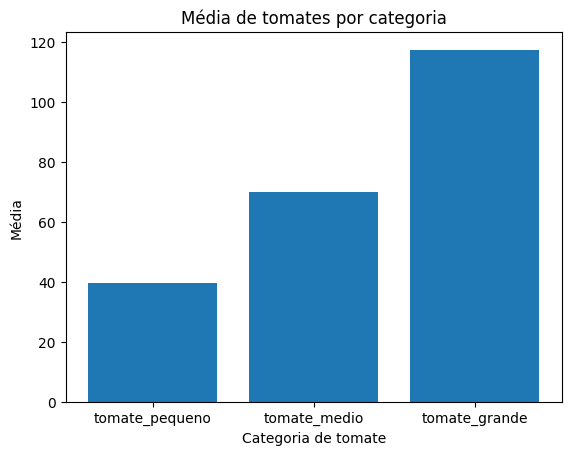

In [26]:
plt.bar(df_tomato["categoria_tomate"], df_tomato["Average"])
plt.xlabel("Categoria de tomate")
plt.ylabel("Média")
plt.title("Média de tomates por categoria")
plt.show()

In [27]:
df_tomato.head(3)

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate_pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate_pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate_pequeno


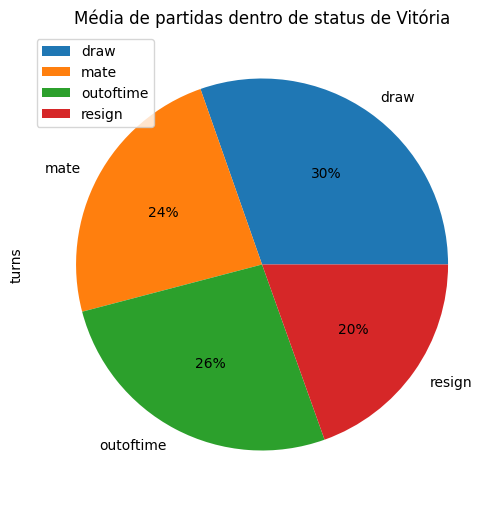

In [28]:
df_chess.groupby(["victory_status"]).mean(numeric_only=True).plot(kind="pie", y="turns", autopct="%1.0f%%", figsize=[6,7])
plt.title("Média de partidas dentro de status de Vitória")
plt.show()

In [29]:
df_diabetes = pd.read_csv("diabetes.csv", sep=",")

In [30]:
df_diabetes

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [32]:
from sklearn.model_selection import train_test_split

In [36]:
x = df_diabetes.drop(["Class variable"], axis=1)
x

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [37]:
y= df_diabetes["Class variable"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class variable, Length: 768, dtype: int64

In [38]:
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.3)

In [39]:
x_train

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
420,1,119,88,41,170,45.3,0.507,26
57,0,100,88,60,110,46.8,0.962,31
549,4,189,110,31,0,28.5,0.680,37
173,1,79,60,42,48,43.5,0.678,23
511,0,139,62,17,210,22.1,0.207,21
...,...,...,...,...,...,...,...,...
337,5,115,76,0,0,31.2,0.343,44
60,2,84,0,0,0,0.0,0.304,21
581,6,109,60,27,0,25.0,0.206,27
191,9,123,70,44,94,33.1,0.374,40


In [40]:
len(x_train)

537

In [41]:
df_diabetes.shape

(768, 9)

In [42]:
len(x_test)

231

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)

In [45]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
accuracy = knn.score(x_test, y_test)

In [48]:
accuracy

0.6926406926406926